The labeler

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import sys
import copy

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import savemat

import torch
import torchvision
import torchvision.transforms as transforms

import pathlib

In [5]:
## find slash type of operating system

if sys.platform == 'linux':
    slash_type = '/'
    print('Autodetected operating system: Linux. Using "/" for directory slashes')
elif sys.platform == 'win32':
    slash_type = '\\'
    print(f'Autodetected operating system: Windows. Using "{slash_type}{slash_type}" for directory slashes')
elif sys.platform == 'darwin':
    slash_type = '/'
    print("What computer are you running this on? I haven't tested it on OSX or anything except windows and ubuntu.")
    print('Autodetected operating system: OSX. Using "/" for directory slashes')
    

Autodetected operating system: Linux. Using "/" for directory slashes


In [7]:
## lOAD & PREPROCESS stat.npy file
## outputs: 'images' (input into CNN)

dir_load = r'/media/rich/bigSSD RH/res2p/scanimage data/round 4 experiments/mouse 6.28/20201102/suite2p/plane0'
fileName_load = 'stat.npy'

# PATH_absolute = pathlib.Path('.').absolute()
# PATH_load_dir_statFile = f'{PATH_absolute}/ROI_Classifiers/label data/mouse 6_28 _ day 20200903/'
path_load = f'{dir_load}{slash_type}{fileName_load}'
# PATH_load_dir_statFile = '/media/rich/Home_Linux_partition/GoogleDrive_ocaml_cache/Research/Sabatini Lab Stuff - working/Code/PYTHON/ROI_Classifiers/test data_ mouse2_5 _ 20200308/'
# PATH_load_dir_statFile = '/media/rich/Home_Linux_partition/GoogleDrive_ocaml_cache/Research/Sabatini Lab Stuff - working/Code/PYTHON/ROI_Classifiers/label data/mouse 6_28 _ day 20200903/'
# PATH_load_dir_statFile = '/media/rich/Home_Linux_partition/GoogleDrive_ocaml_cache/Research/Sabatini Lab Stuff - working/Code/PYTHON/ROI_Classifiers/test data_mouse6_28 _ 20200815/'
print(path_load)

/media/rich/bigSSD RH/res2p/scanimage data/round 4 experiments/mouse 6.28/20201102/suite2p/plane0/stat.npy


stat file loaded
Number of ROIs: 4817


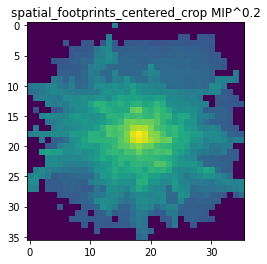

In [9]:
stat = np.load(path_load, allow_pickle=True)
print('stat file loaded')

num_ROI = stat.shape[0]
print(f'Number of ROIs: {num_ROI}')

height = 512
width = 1024
spatial_footprints_centered = np.zeros((num_ROI, 241,241))
for i in range(num_ROI):
    spatial_footprints_centered[i , stat[i]['ypix'] - np.int16(stat[i]['med'][0]) + 120, stat[i]['xpix'] - np.int16(stat[i]['med'][1]) + 120] = stat[i]['lam'] # this is formatted for coding ease (dim1: y pix) (dim2: x pix) (dim3: ROI#)
spatial_footprints_centered_crop = spatial_footprints_centered[:, 102:138 , 102:138]

%matplotlib inline
plt.figure()
plt.imshow(np.max(spatial_footprints_centered_crop , axis=0) ** 0.2);
plt.title('spatial_footprints_centered_crop MIP^0.2');

images = spatial_footprints_centered_crop

In [11]:
# Label: **1=Neuron-InPlane-GOOD , 2=Neuron-OutOfPlane-GOOD , 3=NonNeuron-GOOD , 4=Neuron-InPlane-BAD , 5=Neuron-OutOfPlane-BAD , **6=NonNeuron-BAD

# To stop labeling enter a value of 8-9
num_ROI = images.shape[0]

labels = np.empty(num_ROI)
labels[:] = np.nan
print(f'number of ROIs: {num_ROI}')

number of ROIs: 4817


KeyboardInterrupt: Interrupted by user

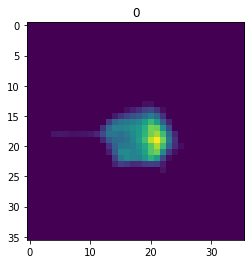

In [15]:
%matplotlib qt

num_ROI = spatial_footprints_centered_crop.shape[0]

input_val = 0
iter_ROI = 0

plt.figure()
# plt.imshow(spatial_footprints_crop[: , : , 0])
plt.pause(0.5) 

while np.int8(input_val) < 7 and iter_ROI <= num_ROI:
    plt.imshow(spatial_footprints_centered_crop[iter_ROI, : , :])
    plt.title(iter_ROI)
    plt.show(block=False)
    plt.pause(0.35) 
    
    input_val = input()
    if np.int8(input_val) >=7:
        input_val = np.nan
    labels[iter_ROI] = np.int8(input_val)
    plt.pause(0.15) 
    if iter_ROI%10==0:
        print(f'Num labeled: {iter_ROI}')
    
    iter_ROI +=1

In [31]:
plt.figure()
plt.hist(labels,50)

(array([121.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 185.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  77.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 260.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
        4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ]),
 <BarContainer object of 50 artists>)

In [32]:
np.save('labels.npy' , labels)

In [12]:
labels = np.load('labels.npy')

In [13]:
# last labeled ROI
labled_ROI_idx = np.nonzero(np.isnan(labels)==0)
np.max(labled_ROI_idx)


644

In [14]:
plt.figure()
plt.plot(labels)

In [52]:
print(st[0].keys())
st[0]['med'] # middle of neuron/ROI

dict_keys(['ypix', 'lam', 'xpix', 'footprint', 'mrs', 'mrs0', 'compact', 'med', 'npix', 'radius', 'aspect_ratio', 'npix_norm', 'overlap', 'skew', 'std'])


[292.0, 632.0]

In [19]:
print(spatial_footprints_centered.shape)
print(spatial_footprints_centered_crop.shape)

(4868, 241, 241)
(4868, 36, 36)


In [17]:
# dir_save = '/media/rich/Home_Linux_partition/temp files/'
# np.save(f'{dir_save}spatial_footprints_centered_crop.npy' , spatial_footprints_centered_crop)
dir_save = 'G:\\My Drive\\Research\\Sabatini Lab Stuff - working\\Code\\PYTHON\\'
fileName_save = 'spatial_footprints_centered_crop.npy'

In [18]:
np.save(fileName_save , spatial_footprints_centered_crop)

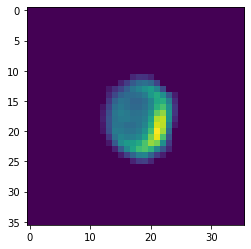

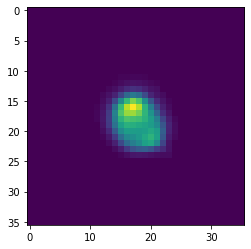

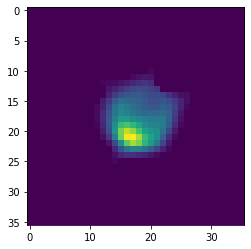

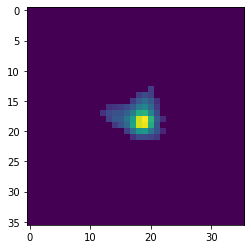

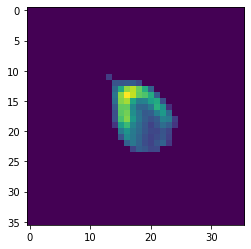

In [24]:
plt.figure()
plt.imshow(spatial_footprints_centered_crop[2,:,:])
plt.figure()
plt.imshow(spatial_footprints_centered_crop[4,:,:])
plt.figure()
plt.imshow(spatial_footprints_centered_crop[3,:,:])
plt.figure()
plt.imshow(spatial_footprints_centered_crop[555,:,:])
plt.figure()
plt.imshow(spatial_footprints_centered_crop[444,:,:])